In [1]:
#pip install fredpy


In [2]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

# Loading API key


In [3]:
fp.api_key = '6ce523c65ffb8915dddf970acab037d6'

The goal of this project is to predit the corporate bond spreads. This notebook provides the code to create the dataframe required to train and run AI/ML models to predict the corporate bond spreads. The inputs used for predicting corporate bond spreads are SP 500, vix, slope(T10y-T2y spreads), skew, GDP, fed fund rate, inflation rate


# Downloading the required input data

The breakeven inflation rate represents a measure of expected inflation derived from 10-Year Treasury Constant Maturity Securities (BC_10YEAR) and 10-Year Treasury Inflation-Indexed Constant Maturity Securities (TC_10YEAR). The latest value implies what market participants expect inflation to be in the next 10 years, on average.
Starting with the update on June 21, 2019, the Treasury bond data used in calculating interest rate spreads is obtained directly from the U.S. Treasury Department.

The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.

The S&P CoreLogic Case-Shiller Home Price Indices are the leading measures of U.S. residential real estate prices, tracking changes in the value of residential real estate nationally.

The effective yield of the ICE BofA AAA US Corporate Index, a subset of the ICE BofA US Corporate Master Index tracking the performance of US dollar denominated investment grade rated corporate debt publicly issued in the US domestic market.

In [4]:
# Restrict observations from January 1, 2014 to 2023 with daily frequency
win = ['01-01-2014','01-01-2023']

sp500 = fp.series('SP500').window(win).as_frequency(freq='D')
vix = fp.series('VIXCLS').window(win).as_frequency(freq='D')
slope = fp.series('T10Y2Y').window(win).as_frequency(freq='D')
gdp = fp.series('GDP').window(win).as_frequency(freq='Q')
fedfund_rate = fp.series('DFF').window(win).as_frequency(freq='D')
breakeven_inflation_rate = fp.series('T10YIE').window(win).as_frequency(freq='D')
case_schiller_index = fp.series('CSUSHPINSA').window(win).as_frequency(freq='M')
cb_spreads = fp.series('BAMLC0A1CAAAEY').window(win).as_frequency(freq='D')
cpi = fp.series('CPIAUCSL').window(win).as_frequency(freq='M')

# Equalize the date ranges
[sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi] = fp.window_equalize([sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi])

# plotting the data


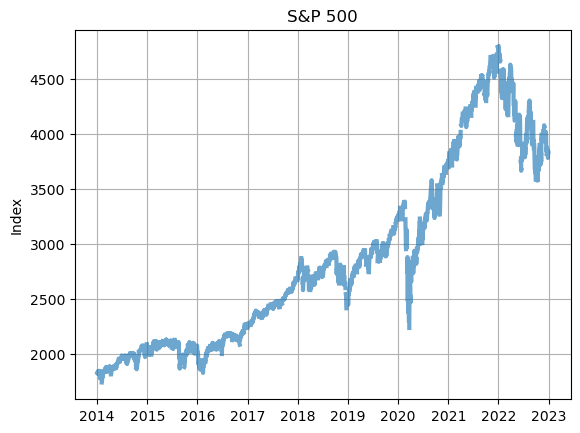

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sp500.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(sp500.title)
ax.set_ylabel(sp500.units);

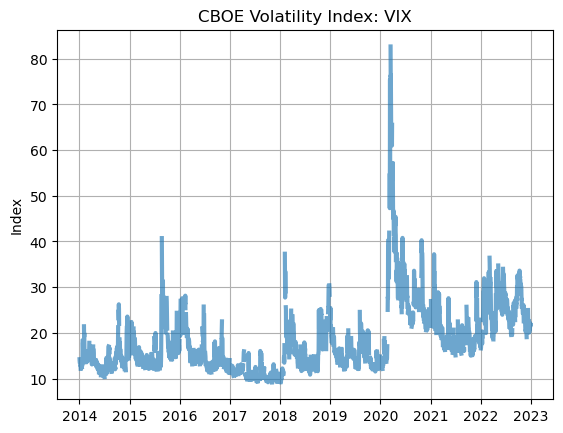

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vix.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(vix.title)
ax.set_ylabel(vix.units);

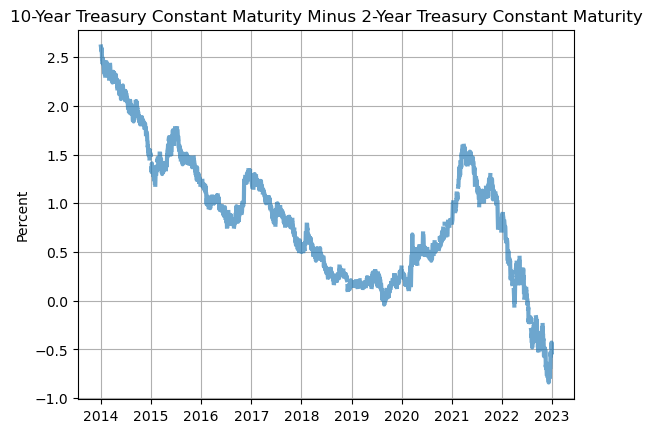

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(slope.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(slope.title)
ax.set_ylabel(slope.units);

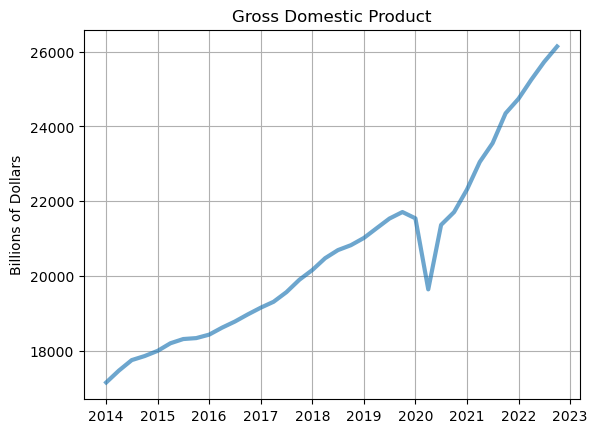

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp.title)
ax.set_ylabel(gdp.units);

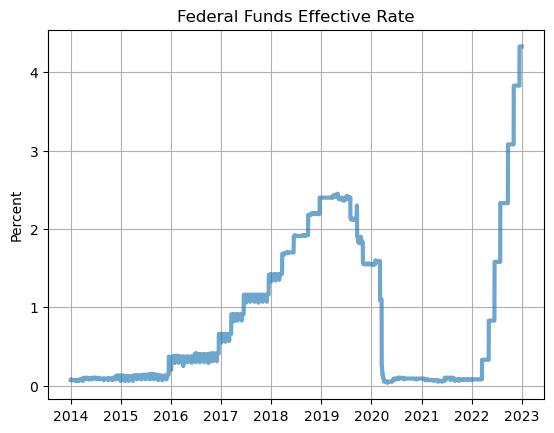

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fedfund_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(fedfund_rate.title)
ax.set_ylabel(fedfund_rate.units);

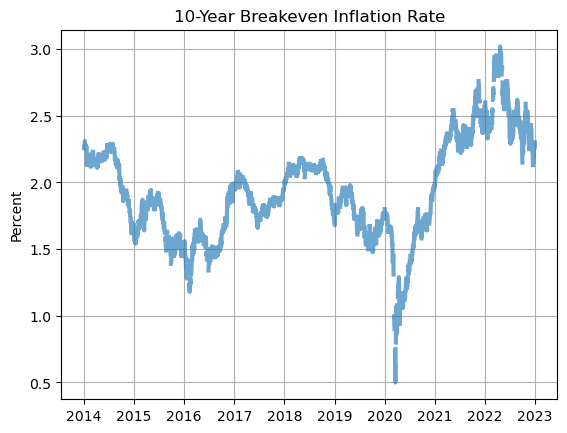

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(breakeven_inflation_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(breakeven_inflation_rate.title)
ax.set_ylabel(breakeven_inflation_rate.units);

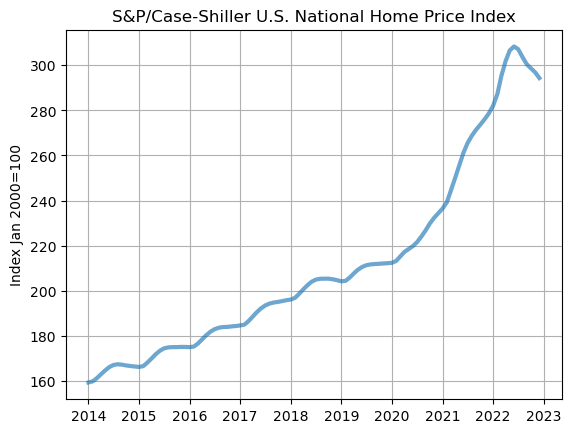

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(case_schiller_index.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(case_schiller_index.title)
ax.set_ylabel(case_schiller_index.units);

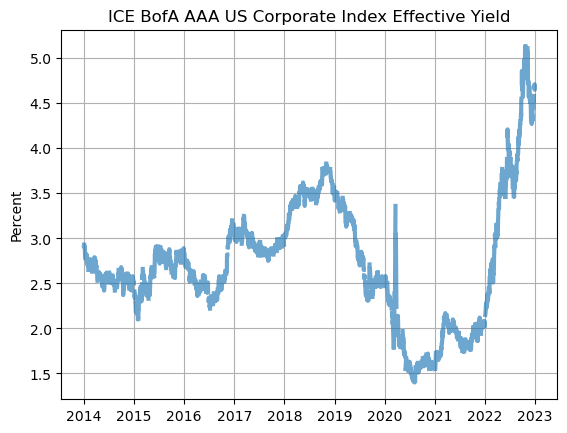

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cb_spreads.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cb_spreads.title)
ax.set_ylabel(cb_spreads.units);

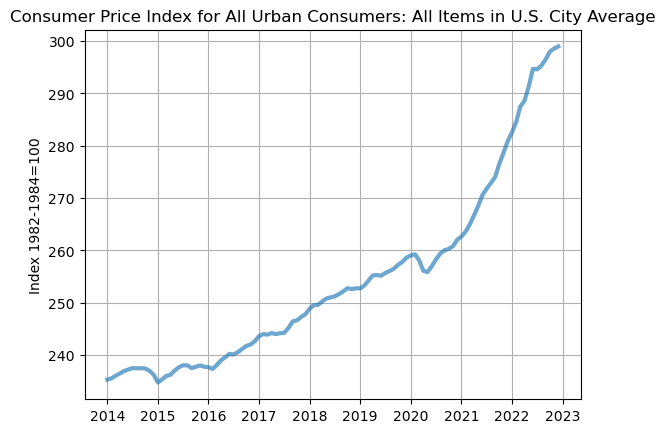

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cpi.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cpi.title)
ax.set_ylabel(cpi.units);

In [14]:
data = {'SP500': sp500.data,'Vix': vix.data, 'slope': slope.data,'GDP': gdp.data,'Fed fund rate': fedfund_rate.data, 'Breakeven inflation rate': breakeven_inflation_rate.data, 'House price index': case_schiller_index.data, 'US-AAA yield': cb_spreads.data,'CPI': cpi.data}


In [15]:
df = pd.DataFrame(data)
df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [16]:

df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [17]:
# interpolated dataframe
df = pd.DataFrame(data)
df['SP500']= np.log(df['SP500'] / df['SP500'].shift())
df = df.interpolate(method='linear', axis=0).ffill().bfill()
df.head()

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,-0.000333,14.23,2.610000,17144.281000,0.07,2.26,159.370000,2.92,235.288000
2014-01-02,-0.000333,14.23,2.610000,17147.819022,0.08,2.26,159.386226,2.92,235.296355
2014-01-03,-0.000333,13.76,2.600000,17151.357044,0.08,2.26,159.402452,2.93,235.304710
2014-01-04,0.001266,13.69,2.593333,17154.895067,0.08,2.26,159.418677,2.92,235.313065
2014-01-05,0.002865,13.62,2.586667,17158.433089,0.08,2.26,159.434903,2.91,235.321419


<AxesSubplot:xlabel='date'>

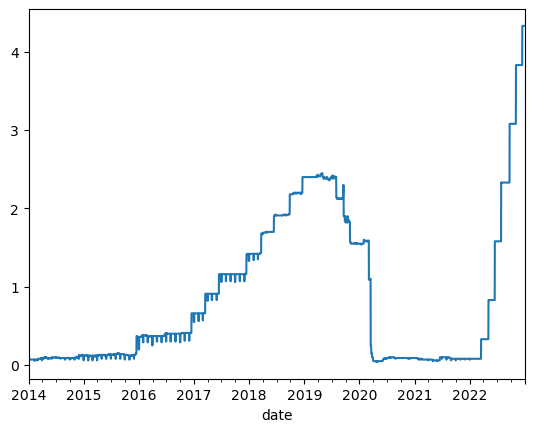

In [18]:
df["Fed fund rate"].plot()

<AxesSubplot:xlabel='date'>

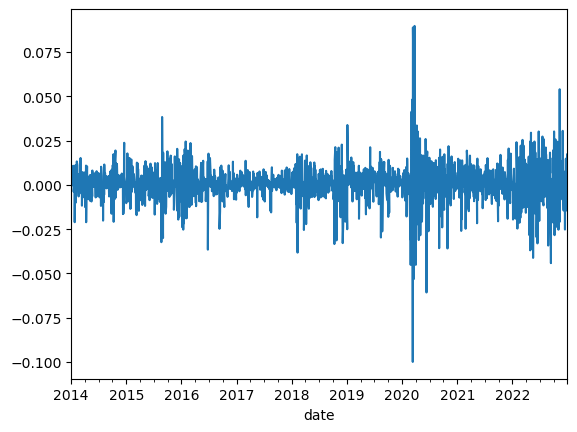

In [19]:
df["SP500"].plot()

# Linear regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['SP500','Vix','slope','GDP','Fed fund rate','Breakeven inflation rate','House price index','CPI']]
y = df['US-AAA yield']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [22]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 9.2678134870266
betas = [-5.92317392e-01  8.07719874e-03 -2.06968644e-01 -8.06599193e-04
  7.76628154e-01  1.04804289e+00  3.75392882e-02 -1.64009422e-03]


In [23]:
Y_predicted = model.predict(X)

In [24]:
df['US-AAA yield OLS predicted' ] = Y_predicted

<AxesSubplot:xlabel='date'>

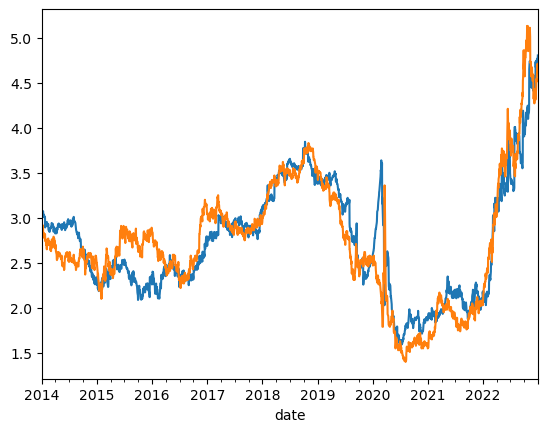

In [25]:
df["US-AAA yield OLS predicted"].plot()
df["US-AAA yield"].plot()


# Ai models

In [26]:
from keras.models import Sequential
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [27]:
df_univariate = df["US-AAA yield"]

In [28]:
train, validate, test = np.split(df_univariate.sample(frac=1, random_state=None), [int(.8*len(df)), int(.9*len(df))])

In [29]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [30]:
n_steps = 30

# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)


In [31]:
print(X_train)
print(Y_train)

[[2.82       2.72       2.5        ... 3.12666667 3.37       4.76      ]
 [2.72       2.5        4.21       ... 3.37       4.76       2.84      ]
 [2.5        4.21       2.62       ... 4.76       2.84       2.55      ]
 ...
 [4.96333333 3.48       2.09       ... 2.59       2.85       2.99333333]
 [3.48       2.09       1.41666667 ... 2.85       2.99333333 2.9       ]
 [2.09       1.41666667 1.59       ... 2.99333333 2.9        2.57      ]]
[2.84 2.55 2.63 ... 2.9  2.57 2.52]


In [32]:
n_features = 1

# define model
model = Sequential()
model.add(InputLayer((n_steps, n_features)))
model.add(GRU(64))
model.add(Dense(n_steps,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 14,845
Trainable params: 14,845
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300,  verbose=1, shuffle=False)

Epoch 1/300
82/82 [==============================] - 3s 16ms/step - loss: 1.1423 - root_mean_squared_error: 1.0688 - val_loss: 0.5064 - val_root_mean_squared_error: 0.7116
Epoch 2/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4981 - root_mean_squared_error: 0.7058 - val_loss: 0.4952 - val_root_mean_squared_error: 0.7037
Epoch 3/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4883 - root_mean_squared_error: 0.6988 - val_loss: 0.4895 - val_root_mean_squared_error: 0.6996
Epoch 4/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4840 - root_mean_squared_error: 0.6957 - val_loss: 0.4878 - val_root_mean_squared_error: 0.6984
Epoch 5/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4820 - root_mean_squared_error: 0.6943 - val_loss: 0.4871 - val_root_mean_squared_error: 0.6979
Epoch 6/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4812 - root_mean_squared_error: 0.6937 - val_loss: 0.4869 - val_

82/82 [==============================] - 1s 11ms/step - loss: 0.4792 - root_mean_squared_error: 0.6923 - val_loss: 0.4831 - val_root_mean_squared_error: 0.6951
Epoch 49/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4792 - root_mean_squared_error: 0.6922 - val_loss: 0.4830 - val_root_mean_squared_error: 0.6950
Epoch 50/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4792 - root_mean_squared_error: 0.6922 - val_loss: 0.4828 - val_root_mean_squared_error: 0.6948
Epoch 51/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4791 - root_mean_squared_error: 0.6922 - val_loss: 0.4826 - val_root_mean_squared_error: 0.6947
Epoch 52/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4794 - root_mean_squared_error: 0.6924 - val_loss: 0.4833 - val_root_mean_squared_error: 0.6952
Epoch 53/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4791 - root_mean_squared_error: 0.6922 - val_loss: 0.4828 - val_root_me

82/82 [==============================] - 1s 10ms/step - loss: 0.4779 - root_mean_squared_error: 0.6913 - val_loss: 0.4800 - val_root_mean_squared_error: 0.6928
Epoch 96/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4779 - root_mean_squared_error: 0.6913 - val_loss: 0.4799 - val_root_mean_squared_error: 0.6928
Epoch 97/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4779 - root_mean_squared_error: 0.6913 - val_loss: 0.4799 - val_root_mean_squared_error: 0.6928
Epoch 98/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4779 - root_mean_squared_error: 0.6913 - val_loss: 0.4799 - val_root_mean_squared_error: 0.6928
Epoch 99/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4778 - root_mean_squared_error: 0.6913 - val_loss: 0.4799 - val_root_mean_squared_error: 0.6928
Epoch 100/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4778 - root_mean_squared_error: 0.6912 - val_loss: 0.4799 - val_root_m

82/82 [==============================] - 1s 11ms/step - loss: 0.4767 - root_mean_squared_error: 0.6904 - val_loss: 0.4811 - val_root_mean_squared_error: 0.6936
Epoch 143/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4767 - root_mean_squared_error: 0.6904 - val_loss: 0.4811 - val_root_mean_squared_error: 0.6936
Epoch 144/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4766 - root_mean_squared_error: 0.6904 - val_loss: 0.4811 - val_root_mean_squared_error: 0.6936
Epoch 145/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4766 - root_mean_squared_error: 0.6904 - val_loss: 0.4810 - val_root_mean_squared_error: 0.6936
Epoch 146/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4766 - root_mean_squared_error: 0.6903 - val_loss: 0.4810 - val_root_mean_squared_error: 0.6936
Epoch 147/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4765 - root_mean_squared_error: 0.6903 - val_loss: 0.4810 - val_ro

82/82 [==============================] - 1s 10ms/step - loss: 0.4747 - root_mean_squared_error: 0.6890 - val_loss: 0.4801 - val_root_mean_squared_error: 0.6929
Epoch 190/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4749 - root_mean_squared_error: 0.6891 - val_loss: 0.4807 - val_root_mean_squared_error: 0.6933
Epoch 191/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4748 - root_mean_squared_error: 0.6891 - val_loss: 0.4809 - val_root_mean_squared_error: 0.6935
Epoch 192/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4745 - root_mean_squared_error: 0.6889 - val_loss: 0.4810 - val_root_mean_squared_error: 0.6935
Epoch 193/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4744 - root_mean_squared_error: 0.6888 - val_loss: 0.4812 - val_root_mean_squared_error: 0.6937
Epoch 194/300
82/82 [==============================] - 1s 10ms/step - loss: 0.4742 - root_mean_squared_error: 0.6886 - val_loss: 0.4809 - val_ro

82/82 [==============================] - 1s 12ms/step - loss: 0.4553 - root_mean_squared_error: 0.6747 - val_loss: 0.4934 - val_root_mean_squared_error: 0.7024
Epoch 237/300
82/82 [==============================] - 1s 13ms/step - loss: 0.4553 - root_mean_squared_error: 0.6748 - val_loss: 0.4939 - val_root_mean_squared_error: 0.7028
Epoch 238/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4539 - root_mean_squared_error: 0.6737 - val_loss: 0.4957 - val_root_mean_squared_error: 0.7041
Epoch 239/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4541 - root_mean_squared_error: 0.6739 - val_loss: 0.4955 - val_root_mean_squared_error: 0.7039
Epoch 240/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4531 - root_mean_squared_error: 0.6732 - val_loss: 0.4967 - val_root_mean_squared_error: 0.7047
Epoch 241/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4534 - root_mean_squared_error: 0.6734 - val_loss: 0.4964 - val_ro

82/82 [==============================] - 1s 13ms/step - loss: 0.4262 - root_mean_squared_error: 0.6529 - val_loss: 0.5293 - val_root_mean_squared_error: 0.7275
Epoch 284/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4246 - root_mean_squared_error: 0.6516 - val_loss: 0.5284 - val_root_mean_squared_error: 0.7269
Epoch 285/300
82/82 [==============================] - 1s 11ms/step - loss: 0.4255 - root_mean_squared_error: 0.6523 - val_loss: 0.5262 - val_root_mean_squared_error: 0.7254
Epoch 286/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4291 - root_mean_squared_error: 0.6550 - val_loss: 0.5240 - val_root_mean_squared_error: 0.7239
Epoch 287/300
82/82 [==============================] - 1s 12ms/step - loss: 0.4247 - root_mean_squared_error: 0.6517 - val_loss: 0.5238 - val_root_mean_squared_error: 0.7237
Epoch 288/300
82/82 [==============================] - 1s 13ms/step - loss: 0.4294 - root_mean_squared_error: 0.6553 - val_loss: 0.5429 - val_ro

In [34]:
# demonstrate prediction
Y_hat = model.predict(X_validate, verbose=0)


In [35]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,3.013088,2.660000
1,2.849291,2.550000
2,2.459485,2.860000
3,2.495561,2.810000
4,2.598772,3.390000
...,...,...
294,2.741908,2.283333
295,2.859129,2.760000
296,2.971026,3.520000
297,2.750709,2.470000


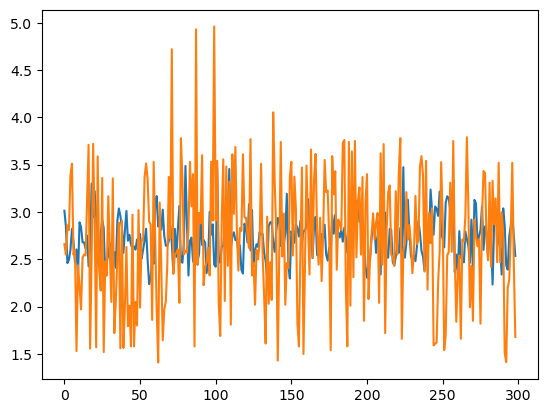

In [36]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [37]:
n_steps = 30
# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)

In [38]:
n_features = 1

# define model
model1 = Sequential()
model1.add(InputLayer((n_steps, n_features)))
model1.add(Conv1D(64,kernel_size=2))
model1.add(Flatten())
model1.add(Dense(n_steps,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 flatten (Flatten)           (None, 1856)              0         
                                                                 
 dense_2 (Dense)             (None, 30)                55710     
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 55,933
Trainable params: 55,933
Non-trainable params: 0
_________________________________________________________________


In [39]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 1s 4ms/step - loss: 0.7856 - root_mean_squared_error: 0.8863 - val_loss: 0.5176 - val_root_mean_squared_error: 0.7195
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5032 - root_mean_squared_error: 0.7093 - val_loss: 0.5159 - val_root_mean_squared_error: 0.7183
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4997 - root_mean_squared_error: 0.7069 - val_loss: 0.5147 - val_root_mean_squared_error: 0.7174
Epoch 4/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4970 - root_mean_squared_error: 0.7050 - val_loss: 0.5139 - val_root_mean_squared_error: 0.7168
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4949 - root_mean_squared_error: 0.7035 - val_loss: 0.5134 - val_root_mean_squared_error: 0.7165
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4934 - root_mean_squared_error: 0.7024 - val_loss: 0.5130 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4883 - root_mean_squared_error: 0.6988 - val_loss: 0.5094 - val_root_mean_squared_error: 0.7137
Epoch 50/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4876 - root_mean_squared_error: 0.6983 - val_loss: 0.5101 - val_root_mean_squared_error: 0.7142
Epoch 51/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4873 - root_mean_squared_error: 0.6981 - val_loss: 0.5102 - val_root_mean_squared_error: 0.7143
Epoch 52/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4871 - root_mean_squared_error: 0.6979 - val_loss: 0.5106 - val_root_mean_squared_error: 0.7145
Epoch 53/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4868 - root_mean_squared_error: 0.6977 - val_loss: 0.5101 - val_root_mean_squared_error: 0.7142
Epoch 54/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4869 - root_mean_squared_error: 0.6978 - val_loss: 0.5107 - val_

82/82 [==============================] - 0s 3ms/step - loss: 0.4805 - root_mean_squared_error: 0.6932 - val_loss: 0.5107 - val_root_mean_squared_error: 0.7146
Epoch 97/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4801 - root_mean_squared_error: 0.6929 - val_loss: 0.5110 - val_root_mean_squared_error: 0.7148
Epoch 98/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4802 - root_mean_squared_error: 0.6930 - val_loss: 0.5102 - val_root_mean_squared_error: 0.7143
Epoch 99/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4795 - root_mean_squared_error: 0.6924 - val_loss: 0.5114 - val_root_mean_squared_error: 0.7151
Epoch 100/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4791 - root_mean_squared_error: 0.6921 - val_loss: 0.5117 - val_root_mean_squared_error: 0.7153
Epoch 101/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4788 - root_mean_squared_error: 0.6919 - val_loss: 0.5116 - val_root_mean_s

82/82 [==============================] - 0s 3ms/step - loss: 0.4746 - root_mean_squared_error: 0.6889 - val_loss: 0.5033 - val_root_mean_squared_error: 0.7094
Epoch 144/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4742 - root_mean_squared_error: 0.6886 - val_loss: 0.5031 - val_root_mean_squared_error: 0.7093
Epoch 145/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4740 - root_mean_squared_error: 0.6884 - val_loss: 0.5028 - val_root_mean_squared_error: 0.7091
Epoch 146/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4739 - root_mean_squared_error: 0.6884 - val_loss: 0.5018 - val_root_mean_squared_error: 0.7084
Epoch 147/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4740 - root_mean_squared_error: 0.6884 - val_loss: 0.5017 - val_root_mean_squared_error: 0.7083
Epoch 148/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4739 - root_mean_squared_error: 0.6884 - val_loss: 0.5017 - val_root_mea

82/82 [==============================] - 0s 3ms/step - loss: 0.4697 - root_mean_squared_error: 0.6853 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7088
Epoch 191/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4696 - root_mean_squared_error: 0.6853 - val_loss: 0.5026 - val_root_mean_squared_error: 0.7089
Epoch 192/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4696 - root_mean_squared_error: 0.6853 - val_loss: 0.5026 - val_root_mean_squared_error: 0.7089
Epoch 193/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4696 - root_mean_squared_error: 0.6853 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7089
Epoch 194/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4695 - root_mean_squared_error: 0.6852 - val_loss: 0.5029 - val_root_mean_squared_error: 0.7091
Epoch 195/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4696 - root_mean_squared_error: 0.6853 - val_loss: 0.5027 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.4684 - root_mean_squared_error: 0.6844 - val_loss: 0.5035 - val_root_mean_squared_error: 0.7096
Epoch 238/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4684 - root_mean_squared_error: 0.6844 - val_loss: 0.5034 - val_root_mean_squared_error: 0.7095
Epoch 239/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4683 - root_mean_squared_error: 0.6844 - val_loss: 0.5034 - val_root_mean_squared_error: 0.7095
Epoch 240/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4683 - root_mean_squared_error: 0.6843 - val_loss: 0.5033 - val_root_mean_squared_error: 0.7095
Epoch 241/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4683 - root_mean_squared_error: 0.6843 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7094
Epoch 242/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4684 - root_mean_squared_error: 0.6844 - val_loss: 0.5027 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.4689 - root_mean_squared_error: 0.6847 - val_loss: 0.5029 - val_root_mean_squared_error: 0.7091
Epoch 285/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4690 - root_mean_squared_error: 0.6848 - val_loss: 0.5027 - val_root_mean_squared_error: 0.7090
Epoch 286/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4689 - root_mean_squared_error: 0.6847 - val_loss: 0.5028 - val_root_mean_squared_error: 0.7091
Epoch 287/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4688 - root_mean_squared_error: 0.6847 - val_loss: 0.5028 - val_root_mean_squared_error: 0.7091
Epoch 288/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4689 - root_mean_squared_error: 0.6848 - val_loss: 0.5028 - val_root_mean_squared_error: 0.7091
Epoch 289/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4689 - root_mean_squared_error: 0.6847 - val_loss: 0.5027 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.4694 - root_mean_squared_error: 0.6851 - val_loss: 0.5027 - val_root_mean_squared_error: 0.7090
Epoch 332/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4693 - root_mean_squared_error: 0.6851 - val_loss: 0.5024 - val_root_mean_squared_error: 0.7088
Epoch 333/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4692 - root_mean_squared_error: 0.6850 - val_loss: 0.5023 - val_root_mean_squared_error: 0.7087
Epoch 334/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4692 - root_mean_squared_error: 0.6850 - val_loss: 0.5022 - val_root_mean_squared_error: 0.7087
Epoch 335/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4690 - root_mean_squared_error: 0.6848 - val_loss: 0.5021 - val_root_mean_squared_error: 0.7086
Epoch 336/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4691 - root_mean_squared_error: 0.6849 - val_loss: 0.5020 - val_root_mea

82/82 [==============================] - 0s 3ms/step - loss: 0.4683 - root_mean_squared_error: 0.6844 - val_loss: 0.4998 - val_root_mean_squared_error: 0.7070
Epoch 379/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4685 - root_mean_squared_error: 0.6845 - val_loss: 0.4997 - val_root_mean_squared_error: 0.7069
Epoch 380/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4684 - root_mean_squared_error: 0.6844 - val_loss: 0.4997 - val_root_mean_squared_error: 0.7069
Epoch 381/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4683 - root_mean_squared_error: 0.6843 - val_loss: 0.4997 - val_root_mean_squared_error: 0.7069
Epoch 382/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4682 - root_mean_squared_error: 0.6843 - val_loss: 0.4997 - val_root_mean_squared_error: 0.7069
Epoch 383/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4682 - root_mean_squared_error: 0.6843 - val_loss: 0.4997 - val_root_mea

82/82 [==============================] - 0s 3ms/step - loss: 0.4683 - root_mean_squared_error: 0.6843 - val_loss: 0.5034 - val_root_mean_squared_error: 0.7095
Epoch 426/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4680 - root_mean_squared_error: 0.6841 - val_loss: 0.5038 - val_root_mean_squared_error: 0.7098
Epoch 427/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4680 - root_mean_squared_error: 0.6841 - val_loss: 0.5040 - val_root_mean_squared_error: 0.7099
Epoch 428/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4679 - root_mean_squared_error: 0.6840 - val_loss: 0.5043 - val_root_mean_squared_error: 0.7101
Epoch 429/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4678 - root_mean_squared_error: 0.6840 - val_loss: 0.5045 - val_root_mean_squared_error: 0.7103
Epoch 430/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4679 - root_mean_squared_error: 0.6841 - val_loss: 0.5049 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.4658 - root_mean_squared_error: 0.6825 - val_loss: 0.5135 - val_root_mean_squared_error: 0.7166
Epoch 473/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4656 - root_mean_squared_error: 0.6823 - val_loss: 0.5135 - val_root_mean_squared_error: 0.7166
Epoch 474/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4654 - root_mean_squared_error: 0.6822 - val_loss: 0.5136 - val_root_mean_squared_error: 0.7166
Epoch 475/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4653 - root_mean_squared_error: 0.6822 - val_loss: 0.5138 - val_root_mean_squared_error: 0.7168
Epoch 476/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4653 - root_mean_squared_error: 0.6821 - val_loss: 0.5139 - val_root_mean_squared_error: 0.7169
Epoch 477/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4651 - root_mean_squared_error: 0.6820 - val_loss: 0.5141 - val_root_mea

In [40]:
# demonstrate prediction
Y_hat1 = model1.predict(X_validate, verbose=0)


In [41]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat1.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,2.543027,2.660000
1,2.550294,2.550000
2,2.556530,2.860000
3,2.600703,2.810000
4,2.539753,3.390000
...,...,...
294,2.659060,2.283333
295,2.662143,2.760000
296,2.639855,3.520000
297,2.734261,2.470000


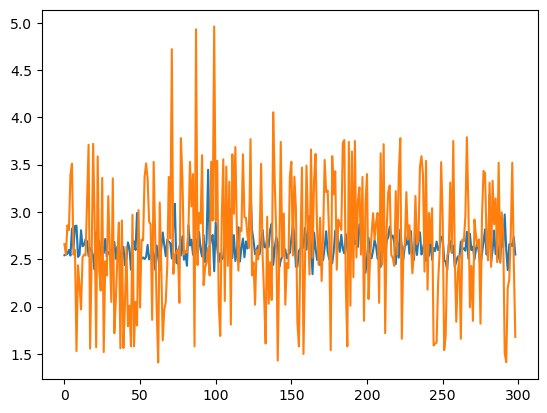

In [42]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

##  Multivariate regression


In [43]:
df1=df[['SP500','Vix','slope',  'GDP','Fed fund rate',  'CPI',  'US-AAA yield']] #Breakeven inflation rate',  'House price index', 'CPI' 'US-AAA yield']

In [44]:
def df_to_X_y2(df,window_size):
    df_as_np = df
    X = []
    Y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][6]
        Y.append(label)

    return np.array(X), np.array(Y)


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# define min max scaler
scaler = StandardScaler()
# transform data
df_scaled = scaler.fit_transform(df1)


In [80]:
df_scaled
n_steps = 16

In [81]:
x,y = df_to_X_y2(df_scaled,n_steps)
x.shape, y.shape

((3270, 16, 7), (3270,))

In [82]:
def train_test_validate_split(x,y):
    data_len = x.shape[0]
    train_len = int(0.8*data_len)
    test_len  = int(0.9*data_len)

    x_train, y_train = x[:train_len], y[:train_len]
    x_val, y_val = x[train_len:test_len], y[train_len:test_len]
    x_test, y_test = x[test_len:],y[test_len:]

    return x_train, y_train,x_test, y_test,x_val, y_val

In [83]:
x.shape[0]

3270

In [84]:
x_train, y_train,x_test, y_test,x_val, y_val = train_test_validate_split(x,y)

## GRU model


In [85]:
n_features = 7

# define model
model_gru = Sequential()
model_gru.add(InputLayer((n_steps, n_features)))
model_gru.add(GRU(64))
model_gru.add(Dense(n_steps,'relu'))
model_gru.add(Dense(1,'linear'))

model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                14016     
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 15,073
Trainable params: 15,073
Non-trainable params: 0
_________________________________________________________________


In [86]:
model_gru.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model_gru.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 3s 13ms/step - loss: 0.7343 - root_mean_squared_error: 0.8569 - val_loss: 2.0644 - val_root_mean_squared_error: 1.4368
Epoch 2/500
82/82 [==============================] - 1s 8ms/step - loss: 0.4328 - root_mean_squared_error: 0.6579 - val_loss: 1.4835 - val_root_mean_squared_error: 1.2180
Epoch 3/500
82/82 [==============================] - 1s 7ms/step - loss: 0.2657 - root_mean_squared_error: 0.5155 - val_loss: 0.9826 - val_root_mean_squared_error: 0.9913
Epoch 4/500
82/82 [==============================] - 1s 7ms/step - loss: 0.1580 - root_mean_squared_error: 0.3975 - val_loss: 0.5762 - val_root_mean_squared_error: 0.7591
Epoch 5/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0923 - root_mean_squared_error: 0.3038 - val_loss: 0.3046 - val_root_mean_squared_error: 0.5519
Epoch 6/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0557 - root_mean_squared_error: 0.2360 - val_loss: 0.1570 - val_root_

Epoch 49/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0037 - root_mean_squared_error: 0.0611 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1425
Epoch 50/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0037 - root_mean_squared_error: 0.0606 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1408
Epoch 51/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1406
Epoch 52/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1390
Epoch 53/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382
Epoch 54/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.0189 - val_

82/82 [==============================] - 1s 7ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1195
Epoch 97/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0071 - root_mean_squared_error: 0.0844 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1085
Epoch 98/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0064 - root_mean_squared_error: 0.0801 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 99/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0051 - root_mean_squared_error: 0.0712 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 100/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0048 - root_mean_squared_error: 0.0691 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1112
Epoch 101/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0113 - val_root_mean_s

82/82 [==============================] - 1s 8ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1056
Epoch 144/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0059 - root_mean_squared_error: 0.0767 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1149
Epoch 145/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1062
Epoch 146/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0053 - root_mean_squared_error: 0.0731 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1142
Epoch 147/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 148/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0047 - root_mean_squared_error: 0.0688 - val_loss: 0.0128 - val_root_mea

82/82 [==============================] - 1s 8ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1137
Epoch 191/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1084
Epoch 192/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0041 - root_mean_squared_error: 0.0643 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1133
Epoch 193/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0038 - root_mean_squared_error: 0.0614 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1087
Epoch 194/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1133
Epoch 195/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.0118 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1095
Epoch 238/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1100
Epoch 239/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0031 - root_mean_squared_error: 0.0561 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 240/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0033 - root_mean_squared_error: 0.0579 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1098
Epoch 241/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1095
Epoch 242/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0121 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
Epoch 285/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1093
Epoch 286/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1055
Epoch 287/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0515 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1095
Epoch 288/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1055
Epoch 289/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0120 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1114
Epoch 332/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1016
Epoch 333/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0023 - root_mean_squared_error: 0.0483 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 334/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1017
Epoch 335/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0023 - root_mean_squared_error: 0.0481 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 336/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0024 - root_mean_squared_error: 0.0495 - val_loss: 0.0103 - val_root_mea

82/82 [==============================] - 1s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 379/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134
Epoch 380/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1072
Epoch 381/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1161
Epoch 382/500
82/82 [==============================] - 1s 10ms/step - loss: 0.0017 - root_mean_squared_error: 0.0407 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 383/500
82/82 [==============================] - 1s 10ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0127 - val_root_m

82/82 [==============================] - 1s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1051
Epoch 426/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1255
Epoch 427/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 428/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1228
Epoch 429/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0019 - root_mean_squared_error: 0.0440 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1132
Epoch 430/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0405 - val_loss: 0.0134 - val_root_mea

82/82 [==============================] - 1s 9ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1254
Epoch 473/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1192
Epoch 474/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1356
Epoch 475/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1111
Epoch 476/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 477/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0025 - root_mean_squared_error: 0.0505 - val_loss: 0.0130 - val_root_mea

In [87]:
# demonstrate prediction
y_hat_gru = model_gru.predict(x_val, verbose=0)

In [88]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_gru.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.845262 -0.858389
1            -0.802933 -0.814813
2            -0.762465 -0.843864
3            -0.722421 -0.863231
4            -0.737068 -0.882599
..                 ...       ...
322          -0.495348 -0.495251
323          -0.509668 -0.393573
324          -0.448767 -0.248317
325          -0.351969 -0.258001
326          -0.316574 -0.267685

[327 rows x 2 columns]


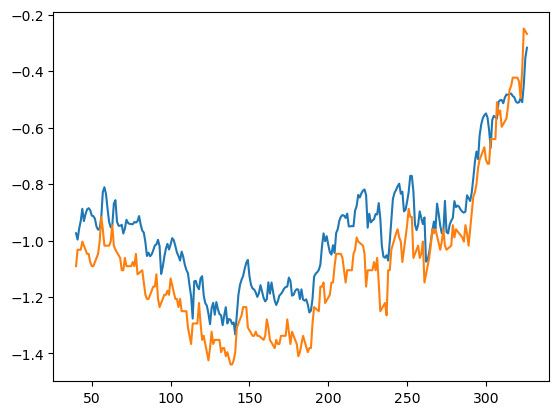

In [89]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])

## 1D Convolutional neural network model

In [90]:
n_features = 7

# define model
model_conv1d = Sequential()
model_conv1d.add(InputLayer((n_steps, n_features)))
model_conv1d.add(Conv1D(64,kernel_size=2))
model_conv1d.add(Dense(n_steps,'relu'))
model_conv1d.add(Dense(1,'linear'))

model_conv1d.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 15, 64)            960       
                                                                 
 flatten_3 (Flatten)         (None, 960)               0         
                                                                 
 dense_12 (Dense)            (None, 16)                15376     
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 16,353
Trainable params: 16,353
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_conv1d.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model_conv1d.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 1s 6ms/step - loss: 0.2492 - root_mean_squared_error: 0.4992 - val_loss: 0.2425 - val_root_mean_squared_error: 0.4925
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1179 - root_mean_squared_error: 0.3434 - val_loss: 0.0507 - val_root_mean_squared_error: 0.2252
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0484 - root_mean_squared_error: 0.2201 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2178
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0344 - root_mean_squared_error: 0.1856 - val_loss: 0.0758 - val_root_mean_squared_error: 0.2753
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0268 - root_mean_squared_error: 0.1636 - val_loss: 0.0472 - val_root_mean_squared_error: 0.2173
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0223 - root_mean_squared_error: 0.1495 - val_loss: 0.0794 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1327
Epoch 50/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1569
Epoch 51/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0076 - root_mean_squared_error: 0.0872 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1273
Epoch 52/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0070 - root_mean_squared_error: 0.0834 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 53/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1275
Epoch 54/500
82/82 [==============================] - 0s 3ms/step - loss: 0.0066 - root_mean_squared_error: 0.0811 - val_loss: 0.0239 - val_

82/82 [==============================] - 0s 2ms/step - loss: 0.0272 - root_mean_squared_error: 0.1650 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1497
Epoch 97/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0323 - root_mean_squared_error: 0.1797 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1677
Epoch 98/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0259 - root_mean_squared_error: 0.1609 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0918
Epoch 99/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0340 - root_mean_squared_error: 0.1844 - val_loss: 0.1099 - val_root_mean_squared_error: 0.3316
Epoch 100/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0286 - root_mean_squared_error: 0.1691 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 101/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0328 - root_mean_squared_error: 0.1811 - val_loss: 0.0948 - val_root_mean_s

82/82 [==============================] - 0s 2ms/step - loss: 0.0096 - root_mean_squared_error: 0.0979 - val_loss: 0.0989 - val_root_mean_squared_error: 0.3145
Epoch 144/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0093 - root_mean_squared_error: 0.0962 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1600
Epoch 145/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0104 - root_mean_squared_error: 0.1018 - val_loss: 0.0973 - val_root_mean_squared_error: 0.3119
Epoch 146/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1572
Epoch 147/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0112 - root_mean_squared_error: 0.1060 - val_loss: 0.0939 - val_root_mean_squared_error: 0.3064
Epoch 148/500
82/82 [==============================] - 0s 3ms/step - loss: 0.0106 - root_mean_squared_error: 0.1030 - val_loss: 0.0228 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0062 - root_mean_squared_error: 0.0788 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1929
Epoch 191/500
82/82 [==============================] - 0s 3ms/step - loss: 0.0061 - root_mean_squared_error: 0.0781 - val_loss: 0.0591 - val_root_mean_squared_error: 0.2430
Epoch 192/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0062 - root_mean_squared_error: 0.0786 - val_loss: 0.0806 - val_root_mean_squared_error: 0.2839
Epoch 193/500
82/82 [==============================] - 0s 3ms/step - loss: 0.0062 - root_mean_squared_error: 0.0790 - val_loss: 0.0476 - val_root_mean_squared_error: 0.2181
Epoch 194/500
82/82 [==============================] - 0s 3ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0873 - val_root_mean_squared_error: 0.2954
Epoch 195/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0053 - root_mean_squared_error: 0.0725 - val_loss: 0.0254 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0056 - root_mean_squared_error: 0.0750 - val_loss: 0.0553 - val_root_mean_squared_error: 0.2351
Epoch 238/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0056 - root_mean_squared_error: 0.0745 - val_loss: 0.0803 - val_root_mean_squared_error: 0.2834
Epoch 239/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1471
Epoch 240/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820 - val_loss: 0.0410 - val_root_mean_squared_error: 0.2025
Epoch 241/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0086 - root_mean_squared_error: 0.0930 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1551
Epoch 242/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0068 - root_mean_squared_error: 0.0824 - val_loss: 0.0212 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0037 - root_mean_squared_error: 0.0611 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1386
Epoch 285/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0038 - root_mean_squared_error: 0.0620 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1229
Epoch 286/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.0426 - val_root_mean_squared_error: 0.2064
Epoch 287/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0052 - root_mean_squared_error: 0.0724 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0983
Epoch 288/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0080 - root_mean_squared_error: 0.0893 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1269
Epoch 289/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0088 - root_mean_squared_error: 0.0937 - val_loss: 0.0414 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1617
Epoch 332/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1837
Epoch 333/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0595 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1239
Epoch 334/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1304
Epoch 335/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0587 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2002
Epoch 336/500
82/82 [==============================] - 0s 3ms/step - loss: 0.0036 - root_mean_squared_error: 0.0600 - val_loss: 0.0205 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1538
Epoch 379/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1123
Epoch 380/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1315
Epoch 381/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1548
Epoch 382/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1706
Epoch 383/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0142 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2398
Epoch 426/500
82/82 [==============================] - 0s 3ms/step - loss: 0.0017 - root_mean_squared_error: 0.0406 - val_loss: 0.0477 - val_root_mean_squared_error: 0.2184
Epoch 427/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0018 - root_mean_squared_error: 0.0422 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1962
Epoch 428/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0480 - val_root_mean_squared_error: 0.2190
Epoch 429/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0019 - root_mean_squared_error: 0.0441 - val_loss: 0.0569 - val_root_mean_squared_error: 0.2385
Epoch 430/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434 - val_loss: 0.0434 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0037 - root_mean_squared_error: 0.0608 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1574
Epoch 473/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1577
Epoch 474/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0028 - root_mean_squared_error: 0.0527 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 475/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0822
Epoch 476/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0907
Epoch 477/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0099 - val_root_mea

In [92]:
y_hat_conv1d = model_conv1d.predict(x_val, verbose=0)

In [93]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_conv1d.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.902033 -0.858389
1            -0.944863 -0.814813
2            -0.841093 -0.843864
3            -0.891333 -0.863231
4            -0.878561 -0.882599
..                 ...       ...
322          -0.548610 -0.495251
323          -0.601292 -0.393573
324          -0.483762 -0.248317
325          -0.391925 -0.258001
326          -0.398782 -0.267685

[327 rows x 2 columns]


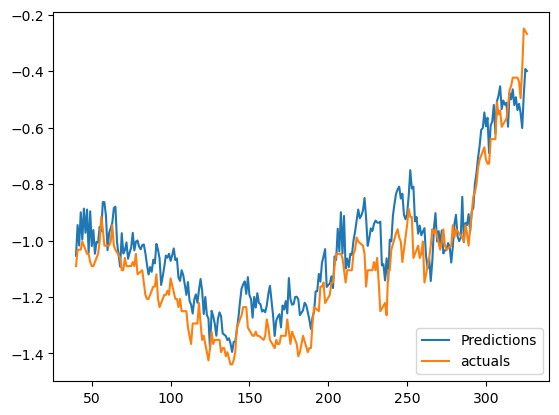

In [94]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")

### LSTM model

In [95]:
n_features = 7

# define model
model_lstm = Sequential()
model_lstm.add(InputLayer((n_steps, n_features)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(n_steps,'relu'))
model_lstm.add(Dense(1,'linear'))

model_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18432     
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                1040      
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 19,489
Trainable params: 19,489
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_lstm.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model_lstm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 3s 13ms/step - loss: 0.4999 - root_mean_squared_error: 0.7070 - val_loss: 1.2430 - val_root_mean_squared_error: 1.1149
Epoch 2/500
82/82 [==============================] - 1s 8ms/step - loss: 0.2466 - root_mean_squared_error: 0.4966 - val_loss: 0.5569 - val_root_mean_squared_error: 0.7462
Epoch 3/500
82/82 [==============================] - 1s 8ms/step - loss: 0.1347 - root_mean_squared_error: 0.3670 - val_loss: 0.2172 - val_root_mean_squared_error: 0.4661
Epoch 4/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0794 - root_mean_squared_error: 0.2817 - val_loss: 0.0969 - val_root_mean_squared_error: 0.3114
Epoch 5/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0513 - root_mean_squared_error: 0.2264 - val_loss: 0.0665 - val_root_mean_squared_error: 0.2579
Epoch 6/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0349 - root_mean_squared_error: 0.1869 - val_loss: 0.0577 - val_root_

Epoch 49/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0061 - root_mean_squared_error: 0.0781 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1664
Epoch 50/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0060 - root_mean_squared_error: 0.0775 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1664
Epoch 51/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1648
Epoch 52/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1642
Epoch 53/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1628
Epoch 54/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0056 - root_mean_squared_error: 0.0749 - val_loss: 0.0266 - val_

82/82 [==============================] - 1s 9ms/step - loss: 0.0033 - root_mean_squared_error: 0.0572 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 97/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1274
Epoch 98/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 99/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1285
Epoch 100/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1299
Epoch 101/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0167 - val_root_mean_s

82/82 [==============================] - 1s 8ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 144/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1288
Epoch 145/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0039 - root_mean_squared_error: 0.0621 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1162
Epoch 146/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0037 - root_mean_squared_error: 0.0605 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 147/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0044 - root_mean_squared_error: 0.0660 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 148/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0037 - root_mean_squared_error: 0.0605 - val_loss: 0.0125 - val_root_mea

82/82 [==============================] - 1s 8ms/step - loss: 0.0030 - root_mean_squared_error: 0.0546 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1032
Epoch 191/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1342
Epoch 192/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1014
Epoch 193/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1174
Epoch 194/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 195/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0133 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1136
Epoch 238/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096
Epoch 239/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1160
Epoch 240/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0989
Epoch 241/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1308
Epoch 242/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0094 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0965
Epoch 285/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1090
Epoch 286/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0023 - root_mean_squared_error: 0.0485 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021
Epoch 287/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1054
Epoch 288/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1035
Epoch 289/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0108 - val_root_mea

82/82 [==============================] - 1s 8ms/step - loss: 0.0024 - root_mean_squared_error: 0.0495 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0911
Epoch 332/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0021 - root_mean_squared_error: 0.0453 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1031
Epoch 333/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1018
Epoch 334/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 335/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0955
Epoch 336/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491 - val_loss: 0.0115 - val_root_mea

82/82 [==============================] - 1s 9ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 379/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0019 - root_mean_squared_error: 0.0435 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 380/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0993
Epoch 381/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0021 - root_mean_squared_error: 0.0458 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897
Epoch 382/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009
Epoch 383/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0076 - val_root_mea

82/82 [==============================] - 1s 11ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0918
Epoch 426/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878
Epoch 427/500
82/82 [==============================] - 1s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885
Epoch 428/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0023 - root_mean_squared_error: 0.0477 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0996
Epoch 429/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0813
Epoch 430/500
82/82 [==============================] - 1s 9ms/step - loss: 0.0021 - root_mean_squared_error: 0.0462 - val_loss: 0.0078 - val_root_me

82/82 [==============================] - 1s 7ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0785
Epoch 473/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0874
Epoch 474/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0816
Epoch 475/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0021 - root_mean_squared_error: 0.0453 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0869
Epoch 476/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843
Epoch 477/500
82/82 [==============================] - 1s 8ms/step - loss: 0.0019 - root_mean_squared_error: 0.0436 - val_loss: 0.0069 - val_root_mea

In [97]:
y_hat_lstm = model_lstm.predict(x_val, verbose=0)

In [98]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_lstm.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.869647 -0.858389
1            -0.844280 -0.814813
2            -0.838889 -0.843864
3            -0.803563 -0.863231
4            -0.801700 -0.882599
..                 ...       ...
322          -0.569305 -0.495251
323          -0.589774 -0.393573
324          -0.613406 -0.248317
325          -0.505974 -0.258001
326          -0.456560 -0.267685

[327 rows x 2 columns]


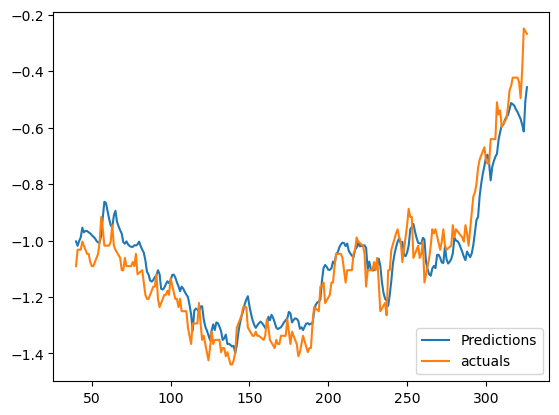

In [99]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")

## Feedforward NN model

In [136]:
n_features = 7

# define model
model_nn = Sequential()
model_nn.add(InputLayer((n_steps, n_features)))
model_nn.add(Dense(n_steps,'relu'))
model_nn.add(Flatten())
model_nn.add(Dense(1,'linear'))





model_nn.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 16, 16)            128       
                                                                 
 flatten_15 (Flatten)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 1)                 257       
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [137]:
model_nn.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 1s 4ms/step - loss: 1.0019 - root_mean_squared_error: 1.0010 - val_loss: 1.6438 - val_root_mean_squared_error: 1.2821
Epoch 2/500
82/82 [==============================] - 0s 3ms/step - loss: 0.7685 - root_mean_squared_error: 0.8766 - val_loss: 0.9724 - val_root_mean_squared_error: 0.9861
Epoch 3/500
82/82 [==============================] - 0s 3ms/step - loss: 0.6022 - root_mean_squared_error: 0.7760 - val_loss: 0.5409 - val_root_mean_squared_error: 0.7354
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4770 - root_mean_squared_error: 0.6906 - val_loss: 0.2770 - val_root_mean_squared_error: 0.5263
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3833 - root_mean_squared_error: 0.6191 - val_loss: 0.1367 - val_root_mean_squared_error: 0.3697
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3142 - root_mean_squared_error: 0.5605 - val_loss: 0.0834 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0430 - root_mean_squared_error: 0.2074 - val_loss: 0.1377 - val_root_mean_squared_error: 0.3711
Epoch 50/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0419 - root_mean_squared_error: 0.2048 - val_loss: 0.1363 - val_root_mean_squared_error: 0.3692
Epoch 51/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0409 - root_mean_squared_error: 0.2023 - val_loss: 0.1350 - val_root_mean_squared_error: 0.3674
Epoch 52/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0399 - root_mean_squared_error: 0.1998 - val_loss: 0.1337 - val_root_mean_squared_error: 0.3656
Epoch 53/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0390 - root_mean_squared_error: 0.1975 - val_loss: 0.1324 - val_root_mean_squared_error: 0.3639
Epoch 54/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0381 - root_mean_squared_error: 0.1951 - val_loss: 0.1313 - val_

82/82 [==============================] - 0s 2ms/step - loss: 0.0167 - root_mean_squared_error: 0.1290 - val_loss: 0.0958 - val_root_mean_squared_error: 0.3095
Epoch 97/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0164 - root_mean_squared_error: 0.1280 - val_loss: 0.0951 - val_root_mean_squared_error: 0.3084
Epoch 98/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0161 - root_mean_squared_error: 0.1269 - val_loss: 0.0944 - val_root_mean_squared_error: 0.3073
Epoch 99/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0159 - root_mean_squared_error: 0.1259 - val_loss: 0.0938 - val_root_mean_squared_error: 0.3063
Epoch 100/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0156 - root_mean_squared_error: 0.1249 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3053
Epoch 101/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0154 - root_mean_squared_error: 0.1239 - val_loss: 0.0926 - val_root_mean_s

82/82 [==============================] - 0s 2ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2758
Epoch 144/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - val_loss: 0.0759 - val_root_mean_squared_error: 0.2756
Epoch 145/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - val_loss: 0.0758 - val_root_mean_squared_error: 0.2754
Epoch 146/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - val_loss: 0.0757 - val_root_mean_squared_error: 0.2752
Epoch 147/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - val_loss: 0.0756 - val_root_mean_squared_error: 0.2750
Epoch 148/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0086 - root_mean_squared_error: 0.0926 - val_loss: 0.0755 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0061 - root_mean_squared_error: 0.0781 - val_loss: 0.0755 - val_root_mean_squared_error: 0.2747
Epoch 191/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0061 - root_mean_squared_error: 0.0778 - val_loss: 0.0756 - val_root_mean_squared_error: 0.2749
Epoch 192/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0060 - root_mean_squared_error: 0.0775 - val_loss: 0.0758 - val_root_mean_squared_error: 0.2752
Epoch 193/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0060 - root_mean_squared_error: 0.0773 - val_loss: 0.0758 - val_root_mean_squared_error: 0.2753
Epoch 194/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0771 - val_loss: 0.0757 - val_root_mean_squared_error: 0.2752
Epoch 195/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0759 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0047 - root_mean_squared_error: 0.0689 - val_loss: 0.0779 - val_root_mean_squared_error: 0.2791
Epoch 238/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0047 - root_mean_squared_error: 0.0688 - val_loss: 0.0818 - val_root_mean_squared_error: 0.2861
Epoch 239/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0047 - root_mean_squared_error: 0.0685 - val_loss: 0.0828 - val_root_mean_squared_error: 0.2877
Epoch 240/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0047 - root_mean_squared_error: 0.0687 - val_loss: 0.0773 - val_root_mean_squared_error: 0.2781
Epoch 241/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0048 - root_mean_squared_error: 0.0694 - val_loss: 0.0705 - val_root_mean_squared_error: 0.2656
Epoch 242/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0048 - root_mean_squared_error: 0.0690 - val_loss: 0.0734 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0040 - root_mean_squared_error: 0.0634 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2886
Epoch 285/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0041 - root_mean_squared_error: 0.0636 - val_loss: 0.0782 - val_root_mean_squared_error: 0.2797
Epoch 286/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - val_loss: 0.0809 - val_root_mean_squared_error: 0.2844
Epoch 287/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0040 - root_mean_squared_error: 0.0629 - val_loss: 0.0858 - val_root_mean_squared_error: 0.2930
Epoch 288/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0844 - val_root_mean_squared_error: 0.2905
Epoch 289/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0811 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0036 - root_mean_squared_error: 0.0600 - val_loss: 0.0837 - val_root_mean_squared_error: 0.2892
Epoch 332/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.0892 - val_root_mean_squared_error: 0.2986
Epoch 333/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0595 - val_loss: 0.0886 - val_root_mean_squared_error: 0.2977
Epoch 334/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0843 - val_root_mean_squared_error: 0.2903
Epoch 335/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0863 - val_root_mean_squared_error: 0.2937
Epoch 336/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0903 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0914 - val_root_mean_squared_error: 0.3024
Epoch 379/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0844 - val_root_mean_squared_error: 0.2905
Epoch 380/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - val_loss: 0.0832 - val_root_mean_squared_error: 0.2885
Epoch 381/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0909 - val_root_mean_squared_error: 0.3015
Epoch 382/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0033 - root_mean_squared_error: 0.0570 - val_loss: 0.0954 - val_root_mean_squared_error: 0.3089
Epoch 383/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0923 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0036 - root_mean_squared_error: 0.0604 - val_loss: 0.0911 - val_root_mean_squared_error: 0.3018
Epoch 426/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0043 - root_mean_squared_error: 0.0656 - val_loss: 0.1200 - val_root_mean_squared_error: 0.3465
Epoch 427/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3053
Epoch 428/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0040 - root_mean_squared_error: 0.0633 - val_loss: 0.0724 - val_root_mean_squared_error: 0.2690
Epoch 429/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0045 - root_mean_squared_error: 0.0670 - val_loss: 0.0824 - val_root_mean_squared_error: 0.2871
Epoch 430/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0917 - val_root_mea

82/82 [==============================] - 0s 2ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0855 - val_root_mean_squared_error: 0.2924
Epoch 473/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552 - val_loss: 0.0870 - val_root_mean_squared_error: 0.2950
Epoch 474/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0839 - val_root_mean_squared_error: 0.2896
Epoch 475/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0030 - root_mean_squared_error: 0.0546 - val_loss: 0.0828 - val_root_mean_squared_error: 0.2877
Epoch 476/500
82/82 [==============================] - 0s 2ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0867 - val_root_mean_squared_error: 0.2945
Epoch 477/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0877 - val_root_mea

In [138]:
y_hat_nn = model_nn.predict(x_val, verbose=0)
len(y_hat_nn.flatten())

327

In [139]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_nn.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.975558 -0.858389
1            -0.950033 -0.814813
2            -0.912435 -0.843864
3            -0.912310 -0.863231
4            -0.894004 -0.882599
..                 ...       ...
322          -1.264534 -0.495251
323          -1.315359 -0.393573
324          -1.200857 -0.248317
325          -1.110571 -0.258001
326          -1.106104 -0.267685

[327 rows x 2 columns]


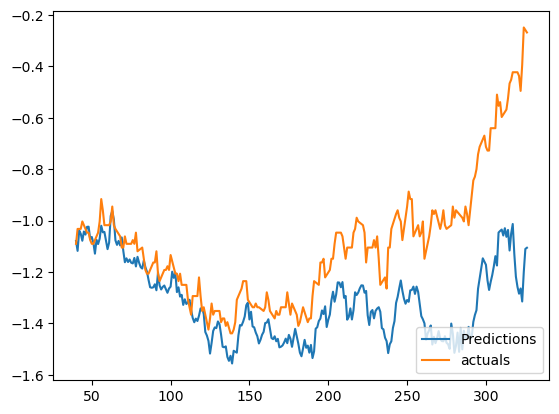

In [140]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")

In [ ]:
# input scaling
scaler_input = StandardScaler()
scaler_input.fit(data)
scaled = scaler_input.transform(data)
print(scaled)

# for inverse transformation
inversed = scaler_input.inverse_transform(scaled)
print(inversed)

# output scaling
scaler_output = StandardScaler()
scaler_output.fit(data)
scaled = scaler_output.transform(data)
print(scaled)

# for inverse transformation
inversed = scaler_output.inverse_transform(scaled)
print(inversed)